# Announcment

- Next course will be on July 15th (next week)
- Optional: Session on QGIS (no date)

# Final Project

Examples:

- A Jupyter notebook, which includes a spatial analysis or a set of analyses that you would be interested.

- A QGIS Plugin that you would like to create for some purpose that you think would be useful

- A small Python package
    
    
    
-> You can do it on your own or work in teams up to 3 people

**Deadline: October 15th 2020**


#  Working with Satellite Images

In [1]:
import rasterio

raster = rasterio.open('Data/raster/demmin/demmin_fields_20170828_band5.tif')

In [2]:
# Projection
print('CRS: ',raster.crs)

# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
print('Transform: ',raster.transform)

# Dimensions
print('Width: ',raster.width)
print('Height: ',raster.height)

# Number of bands
print('Bands: ',raster.count)

# Bounds of the file
print('Boundary: ',raster.bounds)

# Driver (data format)
print('Driver: ', raster.driver)

# No data values for all channels
print('NoData: ', raster.nodatavals)

# All Metadata for the whole raster dataset
print('Metdata: ',raster.meta)


CRS:  EPSG:4314
Transform:  | 0.00, 0.00, 12.98|
| 0.00,-0.00, 53.98|
| 0.00, 0.00, 1.00|
Width:  511
Height:  612
Bands:  1
Boundary:  BoundingBox(left=12.975580184570317, bottom=53.81359321841391, right=13.113069010195925, top=53.97825693912403)
Driver:  GTiff
NoData:  (-3.4028234663852886e+38,)
Metdata:  {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 511, 'height': 612, 'count': 1, 'crs': CRS.from_epsg(4314), 'transform': Affine(0.0002690583671734022, 0.0, 12.975580184570317,
       0.0, -0.0002690583671734022, 53.97825693912403)}


In [3]:
band5 = raster.read(1)

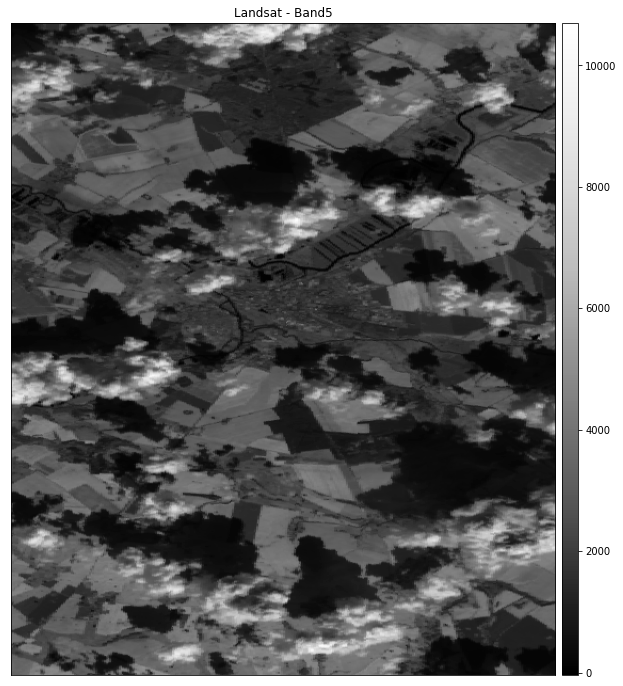

In [4]:
import earthpy.plot as ep

ep.plot_bands(band5, title="Landsat - Band5")

### Create raster stack

But often we don't want to read only one band, but all bands as a stack.

In [5]:
import glob

landsat_paths= glob.glob("Data/raster/demmin/*band*.tif")
landsat_paths.sort()
landsat_paths

['Data/raster/demmin/demmin_fields_20170828_band1.tif',
 'Data/raster/demmin/demmin_fields_20170828_band2.tif',
 'Data/raster/demmin/demmin_fields_20170828_band3.tif',
 'Data/raster/demmin/demmin_fields_20170828_band4.tif',
 'Data/raster/demmin/demmin_fields_20170828_band5.tif',
 'Data/raster/demmin/demmin_fields_20170828_band6.tif',
 'Data/raster/demmin/demmin_fields_20170828_band7.tif']

In [6]:
import earthpy.spatial as es

path_landsat_stack = 'Data/raster/demmin/stacked.tif'
stack = es.stack(landsat_paths, path_landsat_stack)
stack

(array([[[  91.,   91.,   83., ...,  256.,  256.,  277.],
         [  80.,   81.,   78., ...,  265.,  265.,  315.],
         [  80.,   76.,   82., ...,  352.,  352.,  349.],
         ...,
         [1733., 1734., 1734., ...,  475.,  451.,  431.],
         [1736., 1727., 1727., ...,  499.,  466.,  444.],
         [1776., 1750., 1750., ...,  540.,  501.,  458.]],
 
        [[ 204.,  181.,  175., ...,  412.,  412.,  420.],
         [ 162.,  155.,  157., ...,  418.,  418.,  429.],
         [ 150.,  153.,  157., ...,  441.,  441.,  432.],
         ...,
         [1423., 1429., 1429., ...,  462.,  438.,  429.],
         [1422., 1419., 1419., ...,  487.,  458.,  440.],
         [1439., 1418., 1418., ...,  519.,  487.,  451.]],
 
        [[ 157.,  150.,  154., ...,  282.,  282.,  299.],
         [ 137.,  139.,  144., ...,  284.,  284.,  325.],
         [ 144.,  138.,  145., ...,  336.,  336.,  357.],
         ...,
         [ 971.,  970.,  970., ...,  383.,  371.,  361.],
         [ 957.,  966., 

In [7]:
with rasterio.open(path_landsat_stack) as src:
    landsat_stack = src.read()

In [11]:
landsat_stack[5]

array([[  93.,   79.,   74., ...,  182.,  182.,  215.],
       [  65.,   63.,   63., ...,  191.,  191.,  265.],
       [  61.,   63.,   62., ...,  279.,  279.,  313.],
       ...,
       [2436., 2442., 2442., ...,  317.,  311.,  301.],
       [2436., 2453., 2453., ...,  334.,  325.,  314.],
       [2546., 2532., 2532., ...,  360.,  332.,  318.]], dtype=float32)

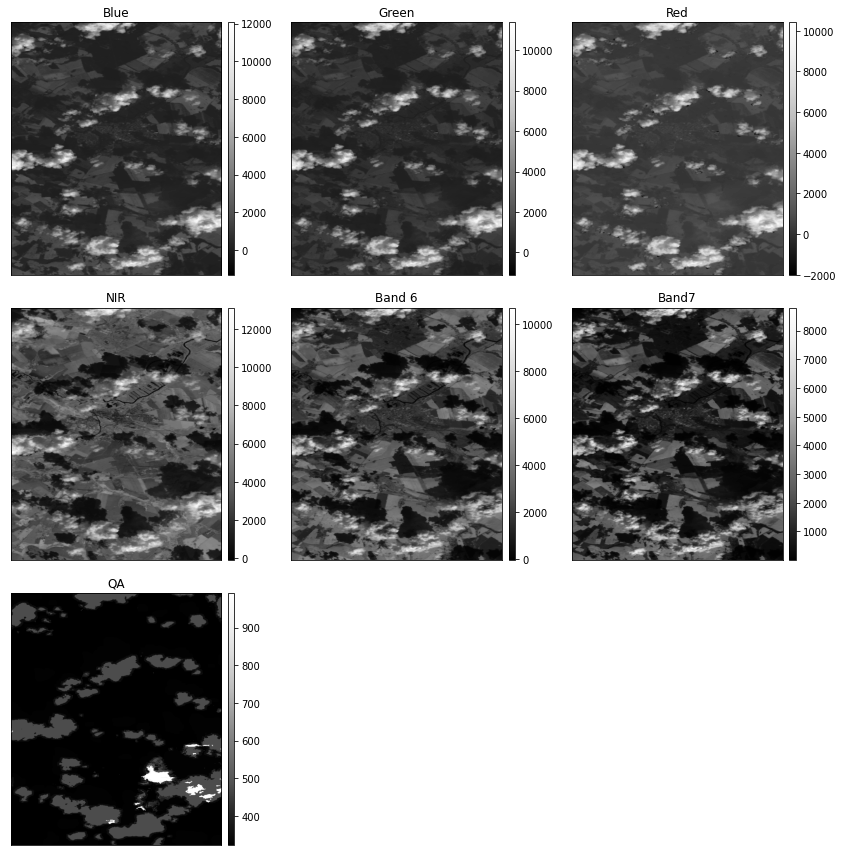

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67e846fe50>,
      dtype=object)

In [14]:
# Plot all bands using earthpy
band_titles = [ "Blue", "Green", "Red", "NIR",
               "Band 6", "Band7", 'QA']
ep.plot_bands(landsat_stack,
              title=band_titles,
              cmap="Greys_r")

### Explore the Range of Values in the Data

(<Figure size 864x864 with 8 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67e866f520>,
       dtype=object))

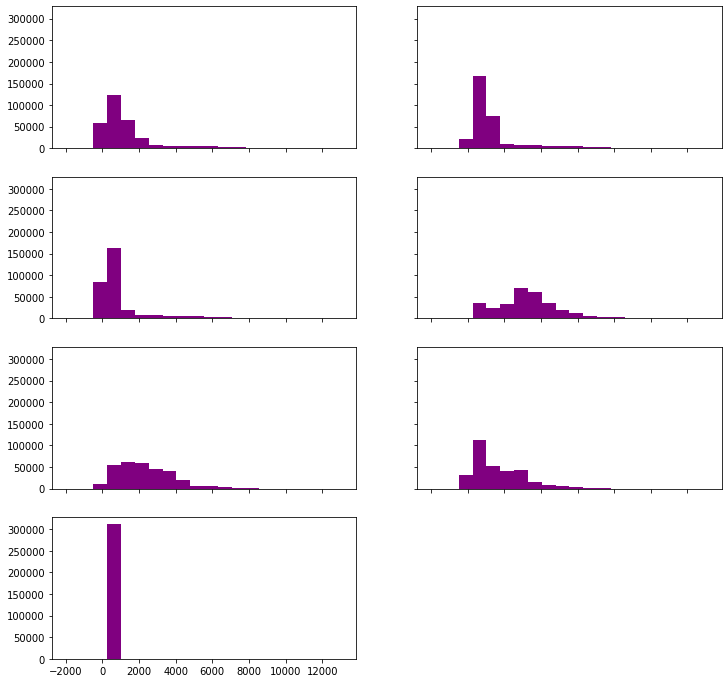

In [15]:
ep.hist(landsat_stack)

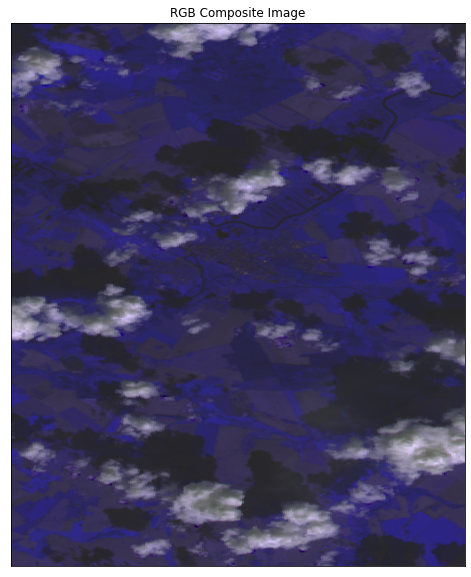

In [17]:
ep.plot_rgb(landsat_stack,
            rgb=[1, 2, 3],
            title="RGB Composite Image")

### Image stretching

Notice that the image above looks dark. Below you use the stretch argument built into the earthpy plot_rgb() function. The str_clip argument allows you to specify how much of the tails of the data that you want to clip off

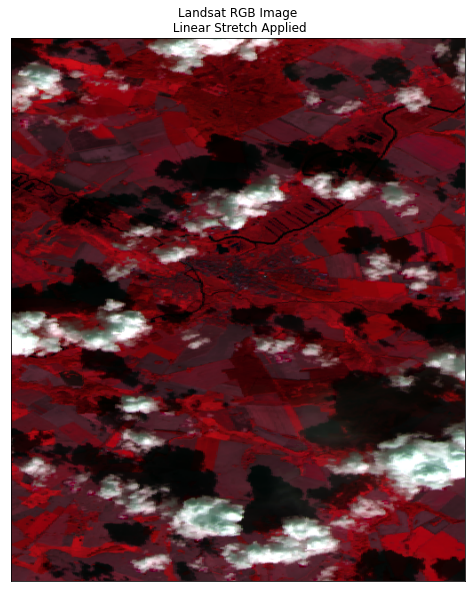

In [18]:
ep.plot_rgb(landsat_stack,
            rgb=[3, 2, 1],
            title="Landsat RGB Image\n Linear Stretch Applied",
            stretch=True,
            str_clip=0.9)

## Reprojection

In [23]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:4326' 

with rasterio.open('Data/raster/demmin/stacked.tif') as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    print(src.transform)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open('Data/raster/demmin/stacked_reproject.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

| 0.00, 0.00, 12.98|
| 0.00,-0.00, 53.98|
| 0.00, 0.00, 1.00|


In [21]:
with rasterio.open('Data/raster/demmin/stacked_reproject.tif') as src:
    raster_reproject = src.read( masked = -9999)
    transform_rep = src.transform

In [22]:
print(transform_rep)

| 0.00, 0.00, 12.97|
| 0.00,-0.00, 53.98|
| 0.00, 0.00, 1.00|


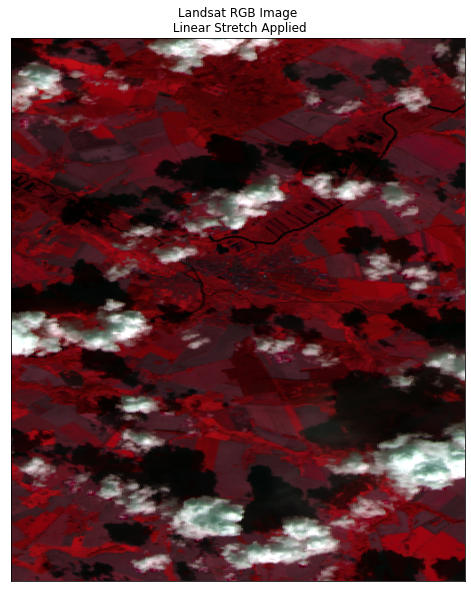

In [24]:

ep.plot_rgb(raster_reproject,
            rgb=[3, 2, 1],
            title="Landsat RGB Image\n Linear Stretch Applied",
            stretch=True,
            str_clip=0.5)

## Clipping images

In [26]:
from rasterio.mask import mask
import geopandas as gpd

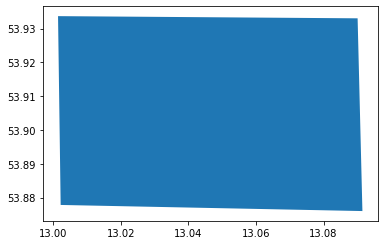

In [27]:
ext = gpd.read_file('Data/vector/extent.shp')
ext.plot()

In [28]:
with rasterio.open('Data/raster/demmin/stacked_reproject.tif') as src:
    raster_reproject = src.read(1)
    transform_rep = src.transform

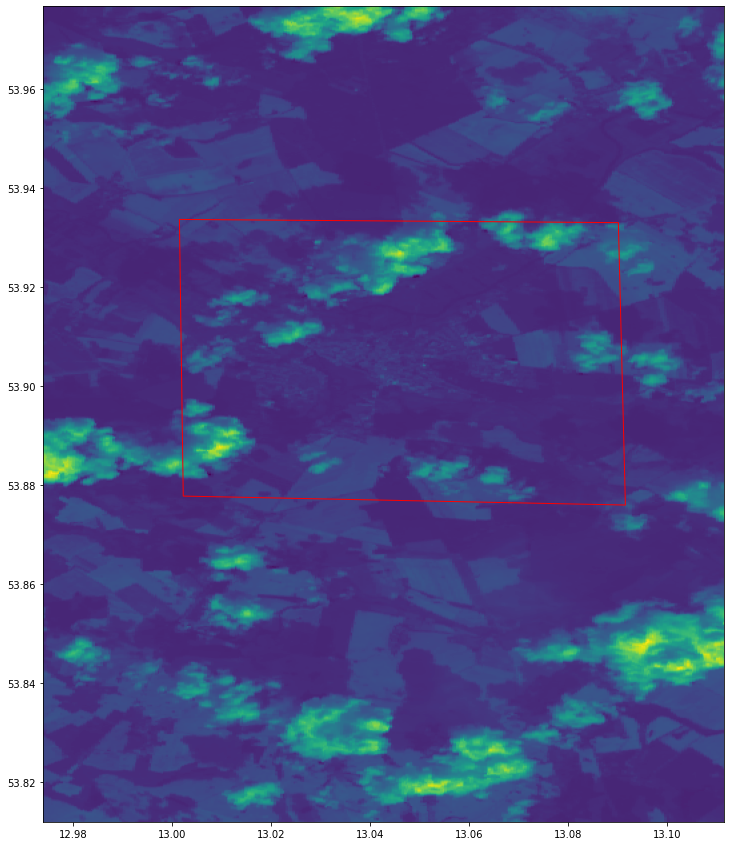

In [29]:
import matplotlib.pyplot as plt
from rasterio.plot import show

fig, ax = plt.subplots(figsize=(15, 15))
show(raster_reproject,transform=transform_rep, ax=ax)
ext.plot(ax=ax, facecolor='none', edgecolor='r');
plt.show()

In [31]:
import fiona
import rasterio
import rasterio.mask

with fiona.open("Data/vector/extent.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

shapes

[{'type': 'Polygon',
  'coordinates': [[(13.001447098065766, 53.933666021029694),
    (13.09007755714145, 53.93302096674238),
    (13.09149667657352, 53.87599816774464),
    (13.002221163210532, 53.87780431974909),
    (13.001447098065766, 53.933666021029694)]]}]

In [32]:
with rasterio.open("Data/raster/demmin/stacked_reproject.tif") as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True, nodata=-9999)
    out_meta = src.meta

In [33]:
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open("Data/raster/demmin/masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)


In [34]:
clipped = rasterio.open('Data/raster/demmin/masked.tif')
clip = clipped.read( masked = -9999)

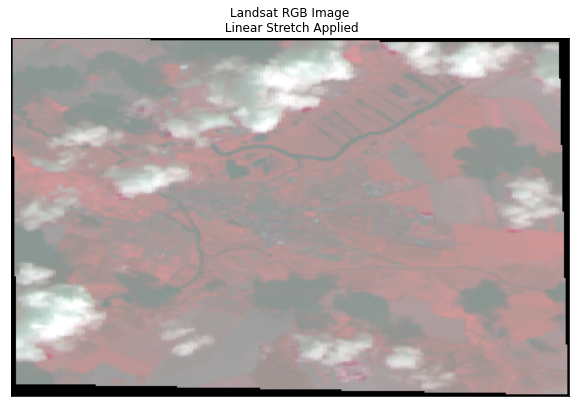

In [35]:
ep.plot_rgb(clip,
            rgb=[3, 2, 1],
            title="Landsat RGB Image\n Linear Stretch Applied",
            stretch=True,
            str_clip=0.5)

### Cloud, Mask, Cloud Shadows

Many remote sensing data sets come with quality layers that you can use as a mask to remove “bad” pixels from your analysis. In the case of landsat, the mask layers identify pixels that are likely representative of cloud cover, shadow and even water. When you download Landsat 8 data from Earth Explorer, the data came with a processed cloud shadow / mask raster layer called landsat_file_name_pixel_qa.tif. 

In [36]:
with rasterio.open("Data/raster/demmin/demmin_fields_20170828_band7.tif") as src:
    landsat_qa = src.read(1)
    
with rasterio.open("Data/raster/demmin/stacked.tif") as src:
    landsat_stack = src.read()

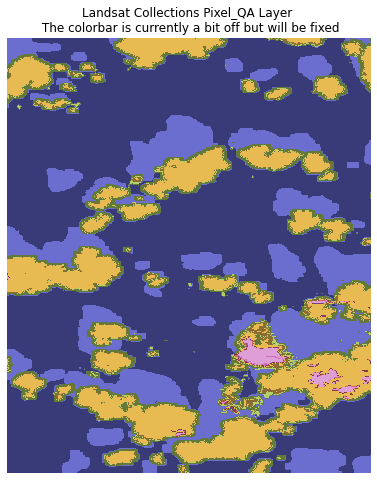

In [37]:
from matplotlib import patches as mpatches, colors
import numpy as np

cmap = plt.cm.get_cmap('tab20b', 11)
vals = np.unique(landsat_qa).tolist()
bins = [0] + vals
bounds = [((a + b) / 2) for a, b in zip(bins[:-1], bins[1::1])] + [(bins[-1] - bins[-2]) + bins[-1]]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(landsat_qa,
               cmap=cmap,
              norm=norm)

ax.set_title("Landsat Collections Pixel_QA Layer \n The colorbar is currently a bit off but will be fixed")
ax.set_axis_off()
plt.show()

<img src="images/pixel_qa.png"  />

In [38]:

cl_mask = np.zeros(landsat_qa.shape)

# Generate array of all possible cloud / shadow values
cloud_shadow = [328, 392, 840, 904, 1350]
cloud = [352, 368, 416, 432, 480, 864, 880, 928, 944, 992]
high_confidence_cloud = [480, 992]

all_masked_values = cloud_shadow + cloud + high_confidence_cloud
all_masked_values

[328,
 392,
 840,
 904,
 1350,
 352,
 368,
 416,
 432,
 480,
 864,
 880,
 928,
 944,
 992,
 480,
 992]

In [40]:
# is there a way to do this without a loop?
# populate new array with values of 1 for every pixel that is a cloud or cloud shadow

for cval in all_masked_values:
    # create cloud mask for all relevant cloud values, for the primary scene
    cl_mask[landsat_qa == cval] = 1
    # print(cval)
np.unique(cl_mask)
cl_mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

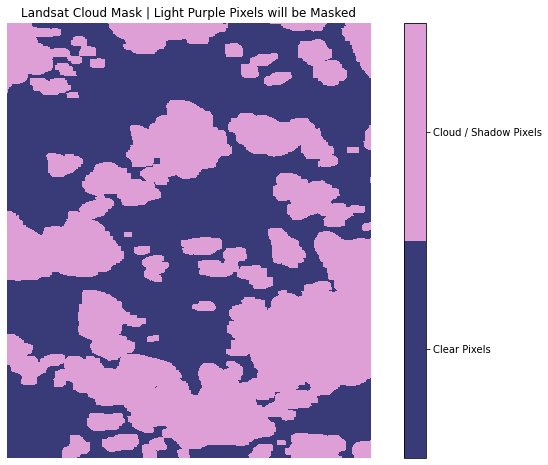

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(cl_mask,
               cmap=plt.cm.get_cmap('tab20b', 2))
cbar = fig.colorbar(im)
cbar.set_ticks((0.25, .75))
cbar.ax.set_yticklabels(["Clear Pixels", "Cloud / Shadow Pixels"])
ax.set_title("Landsat Cloud Mask | Light Purple Pixels will be Masked")
ax.set_axis_off()

plt.show()

In [42]:
# Create a mask for all bands in the landsat scene
import numpy.ma as ma

landsat_pre_mask = np.broadcast_to(cl_mask == 1, landsat_stack.shape)
landsat_pre_cl_free = ma.masked_array(landsat_stack,
                                      mask=landsat_pre_mask)


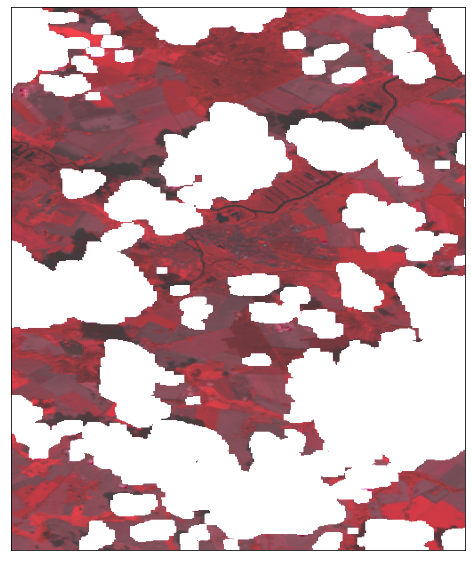

In [43]:
# Plot
import earthpy.plot as ep
ep.plot_rgb(landsat_pre_cl_free,
            rgb=[3, 2, 1])

## Exercise

- Import following Landsat image: Data/raster/timeseries/demmin_20170602.tif
- Calculate the NDVI and export the resulting raster
- Visualize the NDVI
- Import following shapefile:  Data/vector/landuse.shp
- Explore the landuse.shp and look what information it holds
- Select only the wheat fields
- For each wheat field extract the mean NDVI
- Visualize the results

In [128]:
import rasterio

raster = rasterio.open('Data/raster/timeseries/demmin_20170602.tif')
red = raster.read(3)
nir = raster.read(4)
ndvi = (nir - red) / (nir + red)
ndvi

array([[0.7450939 , 0.66856146, 0.5688995 , ..., 0.522994  , 0.522994  ,
        0.52797914],
       [0.51428574, 0.50168514, 0.5012999 , ..., 0.5255364 , 0.5255364 ,
        0.5752266 ],
       [0.50463516, 0.505422  , 0.50132114, ..., 0.63666123, 0.63666123,
        0.65353304],
       ...,
       [0.9415379 , 0.9408129 , 0.9408129 , ..., 0.9395366 , 0.9377432 ,
        0.938439  ],
       [0.9398525 , 0.94118756, 0.94118756, ..., 0.9337603 , 0.9317585 ,
        0.93538916],
       [0.9396928 , 0.9397704 , 0.9397704 , ..., 0.9356854 , 0.93267983,
        0.9350816 ]], dtype=float32)

In [129]:
meta = raster.meta

meta.update(count=1)
meta.update(driver='GTiff')

with rasterio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi, 1)

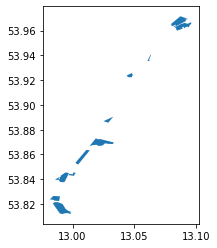

In [130]:
import geopandas as gpd
lu = gpd.read_file('Data/vector/landuse.shp')
#print(lu)
wheat = lu[lu['Crop_class'] == 'Wheat']
wheat.plot()

In [131]:
ndvi=rasterio.open('NDVI.tif')


In [138]:
# Here comes the difficult part
# lets use a function
import numpy as np

from rasterio.mask import mask
def derive_stats(geom, **mask_kw):
    masked, mask_transform = mask(dataset=ndvi, shapes=(geom,),crop=True, nodata=np.nan)
    return masked



In [141]:
import rasterio as rio
ndvi = rio.open('NDVI.tif')


wheat['mean_ndvi'] = wheat.geometry.apply(derive_stats).apply(np.nanmean)
wheat

<ipython-input-141-9e636fe9c866>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wheat['mean_ndvi'] = wheat.geometry.apply(derive_stats).apply(np.nanmean)


Landuse        Landcover Crop_group  LC_ID Crop_class  CG_ID  CC_ID  \
0         wheat  Annual Cropland    Cereals      1      Wheat     11    111   
1         wheat  Annual Cropland    Cereals      1      Wheat     11    111   
8         wheat  Annual Cropland    Cereals      1      Wheat     11    111   
15        wheat  Annual Cropland    Cereals      1      Wheat     11    111   
16        wheat  Annual Cropland    Cereals      1      Wheat     11    111   
19        wheat  Annual Cropland    Cereals      1      Wheat     11    111   
20        wheat  Annual Cropland    Cereals      1      Wheat     11    111   
24  summerwheat  Annual Cropland    Cereals      1      Wheat     11    112   
25        wheat  Annual Cropland    Cereals      1      Wheat     11    111   
30        wheat  Annual Cropland    Cereals      1      Wheat     11    111   
33        wheat  Annual Cropland    Cereals      1      Wheat     11    111   

   Sub_class Crop_pract                                           geometry  \
0       None       None  POLYGON ((13.08280 53.96290, 13.08811 53.96564...   
1       None       None  POLYGON ((13.07933 53.96522, 13.08708 53.97163...   
8       None       None  POLYGON ((13.06061 53.93562, 13.06295 53.94064...   
15      None       None  POLYGON ((13.04367 53.92374, 13.04777 53.92570...   
16      None       None  POLYGON ((13.02500 53.88690, 13.03256 53.89037...   
19      None       None  POLYGON ((13.01870 53.87294, 13.02129 53.87214...   
20      None       None  POLYGON ((13.01111 53.86366, 13.01391 53.86334...   
24      None       None  POLYGON ((12.99694 53.84330, 12.99717 53.84426...   
25      None       None  POLYGON ((12.99046 53.84286, 12.99402 53.84533...   
30      None       None  POLYGON ((12.98171 53.82373, 12.98447 53.82652...   
33      None       None  POLYGON ((12.98409 53.82046, 12.98564 53.82152...   

    mean_ndvi  
0    0.915193  
1    0.921552  
8    0.856425  
15   0.879067  
16   0.905145  
19   0.911428  
20   0.561040  
24   0.911886  
25   0.918597  
30   0.934605  
33   0.931531

## Take advantage of the Cloud

In [80]:
import pandas as pd
import geopandas as gpd
import folium
import os, shutil
from glob import glob
import numpy as np

In [81]:
bounds = gpd.read_file('Data/vector/landuse.shp')

In [82]:
import wget

url = 'https://landsat.usgs.gov/sites/default/files/documents/WRS2_descending.zip'
filename = wget.download(url)


In [83]:
shutil.unpack_archive('WRS2_descending.zip','wrs2')

In [84]:
wrs = gpd.GeoDataFrame.from_file('wrs2/WRS2_descending.shp')

wrs.head()

AREA  PERIMETER  PR_  PR_ID  RINGS_OK  RINGS_NOK  PATH  ROW MODE  \
0  15.74326   26.98611  1.0    1.0         1          0    13    1    D   
1  14.55366   25.84254  2.0    2.0         1          0    13    2    D   
2  13.37247   24.20303  3.0    3.0         1          0    13    3    D   
3  12.26691   22.40265  4.0    4.0         1          0    13    4    D   
4  11.26511   20.64284  5.0    5.0         1          0    13    5    D   

   SEQUENCE   WRSPR      PR ACQDayL7 ACQDayL8  \
0      2233  013001  013001        1        9   
1      2234  013002  013002        1        9   
2      2235  013003  013003        1        9   
3      2236  013004  013004        1        9   
4      2237  013005  013005        1        9   

                                            geometry  
0  POLYGON ((-10.80341 80.98880, -8.97407 80.3420...  
1  POLYGON ((-29.24250 80.18681, -29.29593 80.198...  
2  POLYGON ((-24.04206 79.12261, -23.78294 79.063...  
3  POLYGON ((-36.66813 77.46094, -40.05219 78.098...  
4  POLYGON ((-44.11210 76.93656, -44.12470 76.938...

In [86]:
wrs_intersection = wrs[wrs.intersects(bounds.geometry[0])]
wrs_intersection

AREA  PERIMETER     PR_   PR_ID  RINGS_OK  RINGS_NOK  PATH  ROW  \
8701   4.38466      8.897  2998.0  2998.0         1          0   194   22   
24945  4.38466      8.897  2998.0  2998.0         1          0   193   22   

      MODE  SEQUENCE   WRSPR      PR ACQDayL7 ACQDayL8  \
8701     D     15894  194022  194022        5       13   
24945    D     48382  193022  193022       14        6   

                                                geometry  
8701   POLYGON ((10.85281 53.96617, 10.85190 53.96630...  
24945  POLYGON ((12.39783 53.96618, 12.39700 53.96630...

In [88]:
paths, rows = wrs_intersection['PATH'].values, wrs_intersection['ROW'].values
paths

array([194, 193])

In [90]:
# Get the center of the map
xy = np.asarray(bounds.centroid[0].xy).squeeze()
center = list(xy[::-1])

# Select a zoom
zoom = 6

# Create the most basic OSM folium map
m = folium.Map(location=center, zoom_start=zoom, control_scale=True)

# Add the bounds GeoDataFrame in red
m.add_child(folium.GeoJson(bounds.__geo_interface__, name='Area of Study', 
                           style_function=lambda x: {'color': 'red', 'alpha': 0}))

# Iterate through each Polygon of paths and rows intersecting the area
for i, row in wrs_intersection.iterrows():
    # Create a string for the name containing the path and row of this Polygon
    name = 'path: %03d, row: %03d' % (row.PATH, row.ROW)
    # Create the folium geometry of this Polygon 
    g = folium.GeoJson(row.geometry.__geo_interface__, name=name)
    # Add a folium Popup object with the name string
    g.add_child(folium.Popup(name))
    # Add the object to the map
    g.add_to(m)

folium.LayerControl().add_to(m)
m.save('wrs.html')
m

In [ ]:
paths, rows = wrs_intersection['PATH'].values, wrs_intersection['ROW'].values
paths

In [92]:
b = (paths == 194)
paths = paths[b]
rows = rows[b]

rows

array([22])

In [93]:
for i, (path, row) in enumerate(zip(paths, rows)):
    print('Image', i+1, ' - path:', path, 'row:', row)

Image 1  - path: 194 row: 22


In [95]:
s3_scenes = pd.read_csv('http://landsat-pds.s3.amazonaws.com/c1/L8/scene_list.gz', compression='gzip')
s3_scenes

productId               entityId  \
0        LC08_L1TP_149039_20170411_20170415_01_T1  LC81490392017101LGN00   
1        LC08_L1TP_012001_20170411_20170415_01_T1  LC80120012017101LGN00   
2        LC08_L1TP_012002_20170411_20170415_01_T1  LC80120022017101LGN00   
3        LC08_L1TP_012010_20170411_20170415_01_T1  LC80120102017101LGN00   
4        LC08_L1TP_012011_20170411_20170415_01_T1  LC80120112017101LGN00   
...                                           ...                    ...   
2022871  LC08_L1TP_039245_20200705_20200706_01_T1  LC80392452020187LGN00   
2022872  LC08_L1TP_039248_20200705_20200706_01_T1  LC80392482020187LGN00   
2022873  LC08_L1TP_055001_20200705_20200706_01_T1  LC80550012020187LGN00   
2022874  LC08_L1TP_055002_20200705_20200706_01_T1  LC80550022020187LGN00   
2022875  LC08_L1TP_055003_20200705_20200706_01_T1  LC80550032020187LGN00   

                    acquisitionDate  cloudCover processingLevel  path  row  \
0        2017-04-11 05:36:29.349932        0.00            L1TP   149   39   
1        2017-04-11 15:14:40.001201        0.15            L1TP    12    1   
2        2017-04-11 15:15:03.871058        0.38            L1TP    12    2   
3        2017-04-11 15:18:14.918879        0.02            L1TP    12   10   
4        2017-04-11 15:18:38.780265       10.65            L1TP    12   11   
...                             ...         ...             ...   ...  ...   
2022871  2020-07-05 19:39:09.165269        0.87            L1TP    39  245   
2022872  2020-07-05 19:40:20.783319       42.64            L1TP    39  248   
2022873  2020-07-05 19:40:44.657415       10.52            L1TP    55    1   
2022874  2020-07-05 19:41:08.531510        7.71            L1TP    55    2   
2022875  2020-07-05 19:41:32.405606       34.47            L1TP    55    3   

          min_lat    min_lon   max_lat   max_lon  \
0        29.22165   72.41205  31.34742  74.84666   
1        79.51504  -22.06995  81.90314  -7.44339   
2        78.74882  -29.24387  81.14549 -15.04330   
3        69.67856  -56.04655  72.02949 -48.71678   
4        68.38187  -57.33186  70.76840 -51.13822   
...           ...        ...       ...       ...   
2022871  80.55602  -50.25814  82.59423 -35.04094   
2022872  80.14553  -79.99001  82.27265 -64.85835   
2022873  79.48986  -88.37658  81.85979 -73.75834   
2022874  78.71368  -95.54116  81.10622 -81.34607   
2022875  77.80025 -101.35298  80.23083 -88.05393   

                                              download_url  
0        https://s3-us-west-2.amazonaws.com/landsat-pds...  
1        https://s3-us-west-2.amazonaws.com/landsat-pds...  
2        https://s3-us-west-2.amazonaws.com/landsat-pds...  
3        https://s3-us-west-2.amazonaws.com/landsat-pds...  
4        https://s3-us-west-2.amazonaws.com/landsat-pds...  
...                                                    ...  
2022871  https://s3-us-west-2.amazonaws.com/landsat-pds...  
2022872  https://s3-us-west-2.amazonaws.com/landsat-pds...  
2022873  https://s3-us-west-2.amazonaws.com/landsat-pds...  
2022874  https://s3-us-west-2.amazonaws.com/landsat-pds...  
2022875  https://s3-us-west-2.amazonaws.com/landsat-pds...  

[2022876 rows x 12 columns]

In [96]:
# Empty list to add the images
bulk_list = []

# Iterate through paths and rows
for path, row in zip(paths, rows):

    print('Path:',path, 'Row:', row)

    # Filter the Landsat Amazon S3 table for images matching path, row, cloudcover and processing state.
    scenes = s3_scenes[(s3_scenes.path == path) & (s3_scenes.row == row) & 
                       (s3_scenes.cloudCover <= 5) & 
                       (~s3_scenes.productId.str.contains('_T2')) &
                       (~s3_scenes.productId.str.contains('_RT'))]
    print(' Found {} images\n'.format(len(scenes)))

    # If any scenes exists, select the one that have the minimum cloudCover.
    if len(scenes):
        scene = scenes.sort_values('cloudCover').iloc[0]

    # Add the selected scene to the bulk download list.
    bulk_list.append(scene)

Path: 194 Row: 22
 Found 13 images



In [98]:
bulk_frame = pd.concat(bulk_list, 1).T
bulk_frame

productId               entityId  \
2004526  LC08_L1TP_194022_20200601_20200608_01_T1  LC81940222020153LGN00   

                    acquisitionDate cloudCover processingLevel path row  \
2004526  2020-06-01 10:07:50.344887       0.04            L1TP  194  22   

        min_lat  min_lon  max_lat  max_lon  \
2004526  53.349  10.6532  55.5565  14.5456   

                                              download_url  
2004526  https://s3-us-west-2.amazonaws.com/landsat-pds...

 Rasterio knows how to read URLs too, so we just passed the link to the file on AWS

In [99]:
url = bulk_frame['download_url'].iloc[0]
url

'https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/194/022/LC08_L1TP_194022_20200601_20200608_01_T1/index.html'

In [100]:
#url = url.replace('https://', 'https://landsat-pds.') 
url = url.replace('index.html', '') 
url = url + url.split("/")[-2] + '_B4.TIF'

In [101]:
url

'https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/194/022/LC08_L1TP_194022_20200601_20200608_01_T1/LC08_L1TP_194022_20200601_20200608_01_T1_B4.TIF'

Let's plot a low-resolution overview

In [107]:
!export CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt

In [113]:
import matplotlib.pyplot as plt
import rasterio

with rasterio.open(filepath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF') as src:    
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[-1] # let's look at the smallest thumbnail
    print('Decimation factor= {}'.format(oview))
    # NOTE this is using a 'decimated read' (http://rasterio.readthedocs.io/en/latest/topics/resampling.html)
    thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))


print('array type: ',type(thumbnail))
print(thumbnail)

plt.imshow(thumbnail)
plt.colorbar()
plt.title('Overview - Band 4 {}'.format(thumbnail.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

IndexError: tuple index out of range

And now with full resolution but just a small part

In [ ]:
window = rasterio.windows.Window(1024, 1024, 1280, 2560)

with rasterio.open(url) as src:
    subset = src.read(1, window=window)

plt.figure(figsize=(6,8.5))
plt.imshow(subset)
plt.colorbar(shrink=0.5)
plt.title(f'Band 4 Subset\n{window}')
plt.xlabel('Column #')
plt.ylabel('Row #')

In [ ]:
url = bulk_frame['download_url'].iloc[0]
url = url.replace('index.html', '') + url.split("/")[-2]
url

In [ ]:
bred = url + '_B4.TIF'
bnir = url + '_B5.TIF'

In [ ]:
with rasterio.open(bnir) as src:
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    nir = src.read(1)
    

In [ ]:
    
with rasterio.open(bred) as src:
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    red = src.read(1)

In [ ]:
def calc_ndvi(nir,red):
    '''Calculate NDVI from integer arrays'''
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndvi = (nir - red) / (nir + red)
    return ndvi

ndvi = calc_ndvi(nir,red)
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.xlabel('Column #')
plt.ylabel('Row #')

In [ ]:
import mercantile
import matplotlib.pyplot as plt
from rasterio.vrt import WarpedVRT

with rasterio.open('https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/194/025/LC08_L1TP_194025_20140313_20170425_01_T1/LC08_L1TP_194025_20140313_20170425_01_T1_B4.TIF') as src:

    lng, lat = src.lnglat()
    tile = mercantile.tile(lng, lat, 4)
    print(lng,lat)
    merc_bounds = mercantile.xy_bounds(tile)

    with WarpedVRT(src, dst_crs='epsg:3857') as vrt:

        window = vrt.window(*merc_bounds)
        arr_transform = vrt.window_transform(window)
        arr = vrt.read(window=window)

plt.imshow(arr[0])
plt.show()

In [142]:
print('Landsat on AWS:')
filepath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
with rasterio.open(filepath) as src:
    print(src.profile)

Landsat on AWS:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7821, 'height': 7951, 'count': 1, 'crs': CRS.from_epsg(32611), 'transform': Affine(30.0, 0.0, 204285.0,
       0.0, -30.0, 4268115.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


Decimation factor= 81
array type:  <class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Text(0, 0.5, 'Row #')

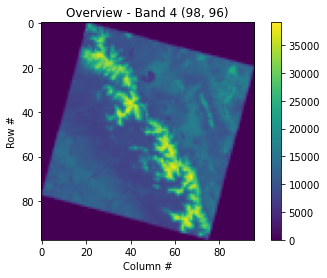

In [144]:
# The grid of raster values can be accessed as a numpy array and plotted:
with rasterio.open(filepath) as src:
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[-1] # let's look at the smallest thumbnail
    print('Decimation factor= {}'.format(oview))
    # NOTE this is using a 'decimated read' (http://rasterio.readthedocs.io/en/latest/topics/resampling.html)
    thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

print('array type: ',type(thumbnail))
print(thumbnail)

plt.imshow(thumbnail)
plt.colorbar()
plt.title('Overview - Band 4 {}'.format(thumbnail.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

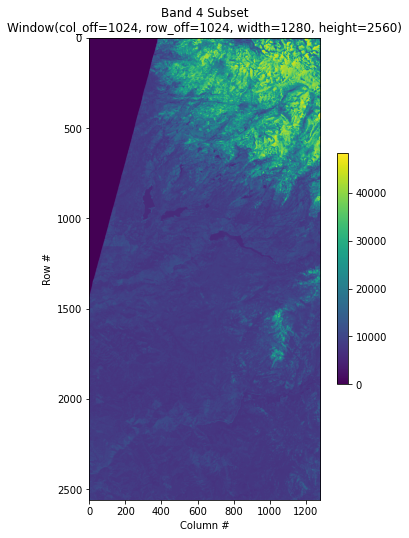

In [145]:
window = rasterio.windows.Window(1024, 1024, 1280, 2560)

with rasterio.open(filepath) as src:
    subset = src.read(1, window=window)

plt.figure(figsize=(6,8.5))
plt.imshow(subset)
plt.colorbar(shrink=0.5)
plt.title(f'Band 4 Subset\n{window}')
plt.xlabel('Column #')
plt.ylabel('Row #')

Decimation factor= 9


Text(0, 0.5, 'Row #')

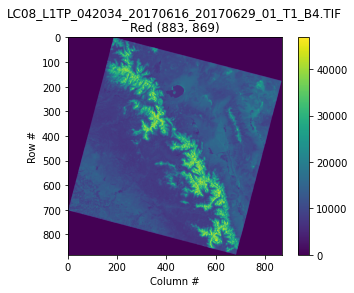

In [146]:
# Use the same example image:
date = '2017-06-16'
url = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/'
redband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(4)
nirband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(5)

with rasterio.open(url+redband) as src:
    profile = src.profile
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    red = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

plt.imshow(red)
plt.colorbar()
plt.title('{}\nRed {}'.format(redband, red.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

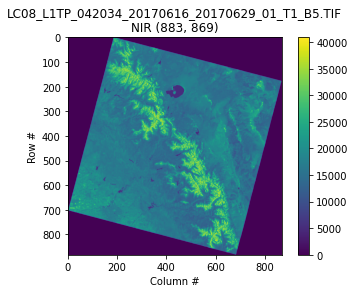

In [147]:
with rasterio.open(url+nirband) as src:
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    nir = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

plt.imshow(nir)
plt.colorbar()
plt.title('{}\nNIR {}'.format(nirband, nir.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

<ipython-input-148-20c0ccfacde0>:5: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (nir - red) / (nir + red)


Text(0, 0.5, 'Row #')

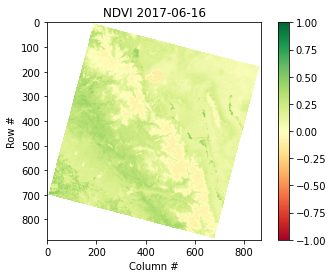

In [148]:
def calc_ndvi(nir,red):
    '''Calculate NDVI from integer arrays'''
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndvi = (nir - red) / (nir + red)
    return ndvi

ndvi = calc_ndvi(nir,red)
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')